In [1]:
!hostname


chinook04.rcs.alaska.edu


In [2]:
import xarray as xr
import os
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
from scipy.stats import linregress

In [3]:
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/'
compare=f'ROS_Monthly_*.nc'
file_list = sorted(glob.glob(os.path.join(path, compare)))
combined_ds=xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')

os.chdir("/import/beegfs/CMIP6/wrf_era5")
geo_em_path = "geo_em.d02.nc"
geo = xr.open_dataset(geo_em_path)
oceanmask=geo['LU_INDEX']
oceanmask=oceanmask.squeeze(dim='Time')
#oceanmask_expanded = oceanmask.expand_dims(Time=data.Time)

combined_ds = combined_ds.where(oceanmask != 17)
era54km=combined_ds

era54kmlat = combined_ds['XLAT'].values
era54kmlon = combined_ds['XLONG'].values


monthlist=['November','December','January','February','March' ]
monthnumberlist=[11,12,1,2,3]


In [4]:
path='/center1/DYNDOWN/phutton5/ROS/Raw_ERA5/Raw_ERA5_netcdf'
pattern=f'Raw*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
era531km = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
#data = data.fillna(0)

seasons=era531km['season']
era531kmlat=era531km['latitude']
era531kmlon=era531km['longitude']


In [5]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]
})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)

In [6]:
borough_boundaries

,OBJECTID,CommunityN,last_updat,created_da,EconomicRe,Census_Are,FIPS,CurrentCer,GISSqMi,geometry
0,1,Aleutians East Borough,2022-06-08,None,Southwest Economic Region,None,02013,https://www.commerce.alaska.gov/web/Portals/4/...,None,"MULTIPOLYGON (((-158.89357 56.77731, -158.8936..."
1,2,Aleutians West Census Area,NaT,None,Southwest Economic Region,Y,02016,None,None,"MULTIPOLYGON (((-178.30779 51.88161, -178.3035..."
2,3,Bethel Census Area,NaT,None,Southwest Economic Region,Y,02050,None,None,"MULTIPOLYGON (((-160.24887 61.81543, -160.2426..."
3,4,Bristol Bay Borough,2022-06-08,None,Southwest Economic Region,None,02060,https://www.commerce.alaska.gov/web/Portals/4/...,None,"POLYGON ((-157.99996 58.64217, -157.98325 58.6..."
4,5,Chugach Census Area,2022-06-09,None,Gulf Coast Economic Region,Y,02063,None,None,"MULTIPOLYGON (((-147.74472 61.35406, -147.7447..."
5,6,City and Borough of Juneau,2024-12-19,None,Southeast Economic Region,None,02110,https://www.commerce.alaska.gov/web/Portals/4/...,None,"POLYGON ((-134.31345 58.96217, -134.33642 58.9..."
6,7,City and Borough of Sitka,2024-12-27,None,Southeast Economic Region,None,02220,https://www.commerce.alaska.gov/web/Portals/4/...,None,"POLYGON ((-135.88943 58.00138, -135.88451 57.9..."
7,8,City and Borough of Wrangell,2022-06-09,None,Southeast Economic Region,None,02275,https://www.commerce.alaska.gov/web/Portals/4/...,None,"POLYGON ((-132.12353 56.87364, -131.87284 56.8..."
8,9,City and Borough of Yakutat,2022-06-08,None,Southeast Economic Region,None,02282,https://www.commerce.alaska.gov/web/Portals/4/...,None,"POLYGON ((-139.1988 60.08829, -139.05363 59.99..."
9,10,Copper River Census Area,2022-06-08,None,Gulf Coast Economic Region,Y,02066,None,None,"POLYGON ((-143.10212 63.03662, -143.09753 63.0..."


In [7]:
Mun_of_Anc_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Municipality of Anchorage']
Bethel_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Bethel Census Area']
Mat_Su_boundary=borough_boundaries[borough_boundaries['CommunityN'] == 'Matanuska-Susitna Borough']

Denali_boundary=borough_boundaries[borough_boundaries['CommunityN'] == 'Denali Borough']


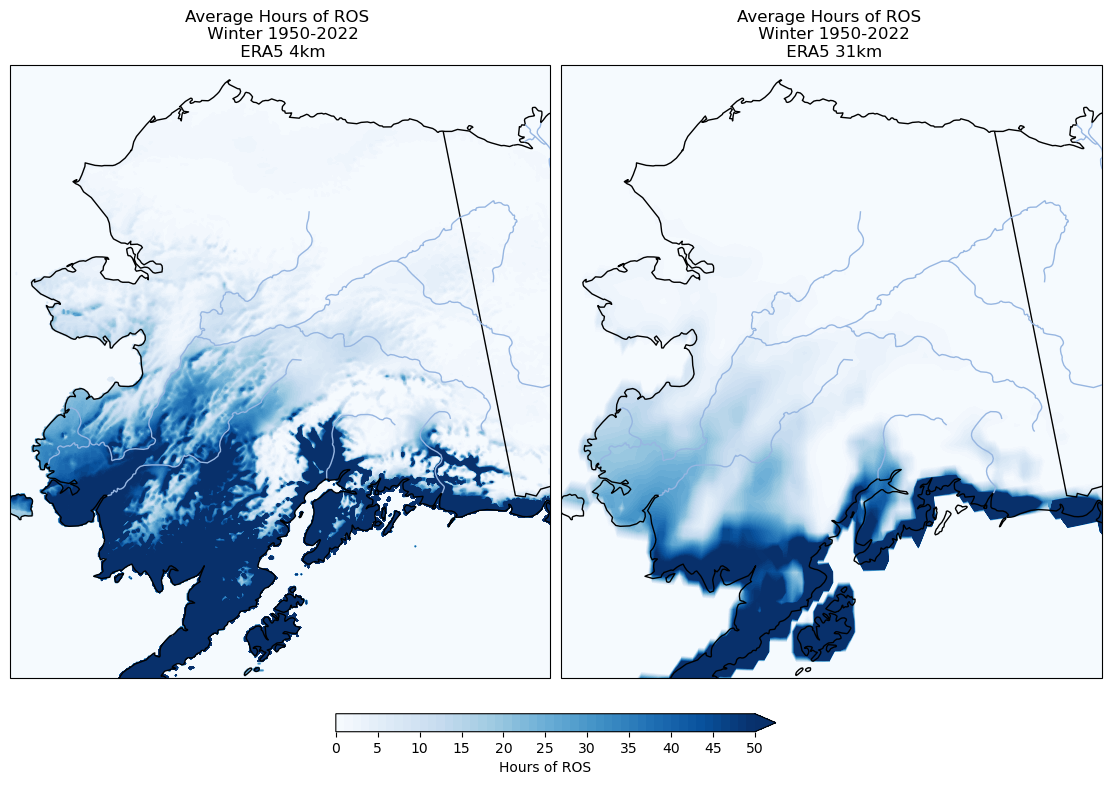

In [8]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,51,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

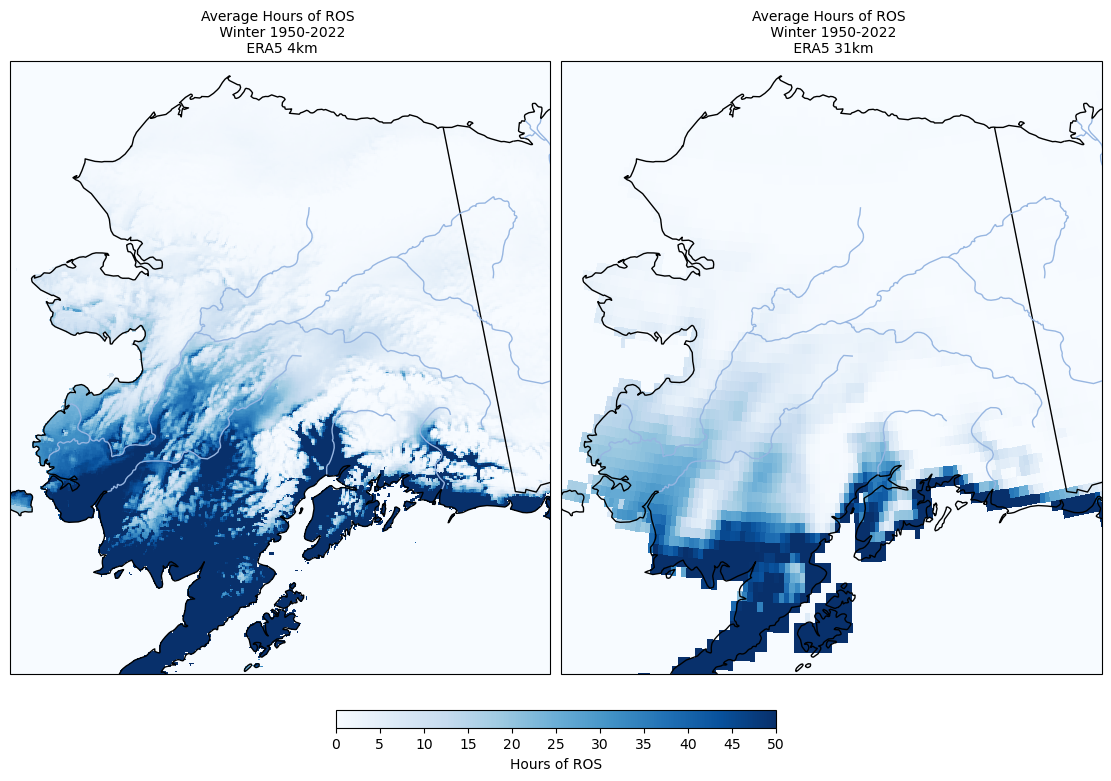

In [9]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 51, 1)

# ERA5 4km - Plot using pcolormesh
pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat,
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'),
                        cmap=cmap, vmin=levels[0], vmax=levels[-1], shading='auto', transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

# ERA5 31km - Plot using pcolormesh
pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat,
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'),
                        cmap=cmap, vmin=levels[0], vmax=levels[-1], shading='auto', transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

# Add features like borders, coastline, etc.
for ax in axs:
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

# Add a colorbar for the first plot (shared colorbar)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()


MONTHYL ANLAYSIS 
- 

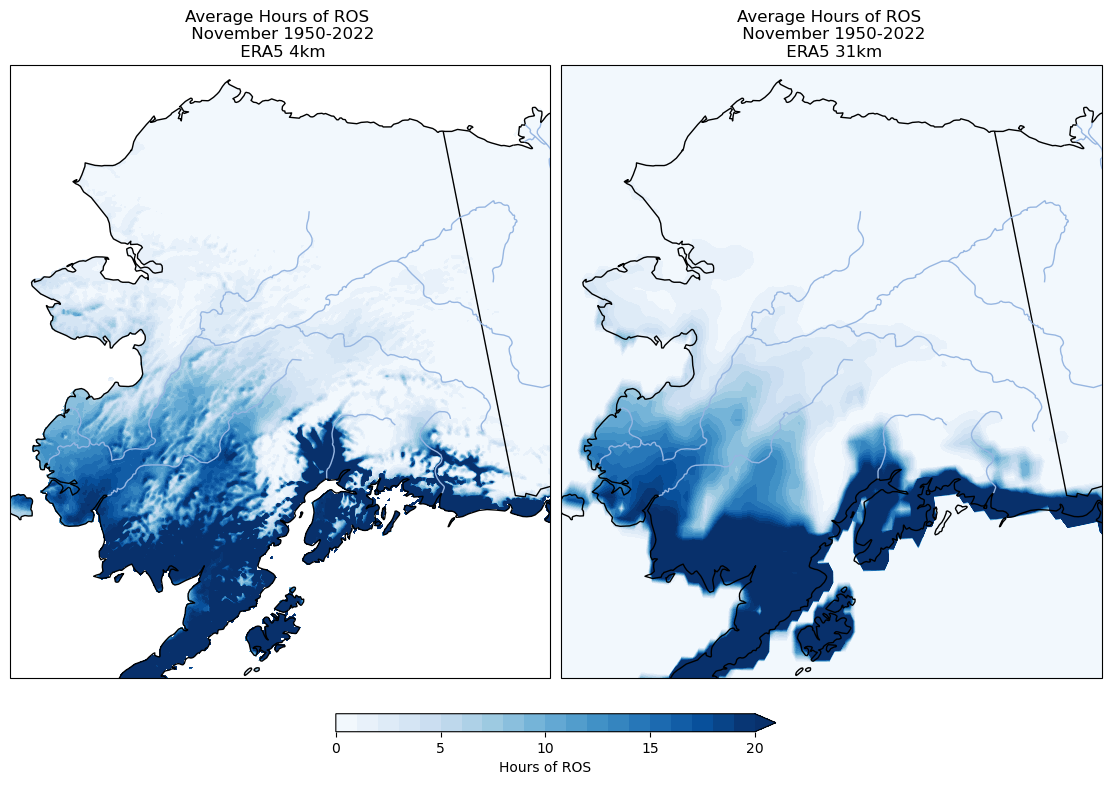

In [10]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

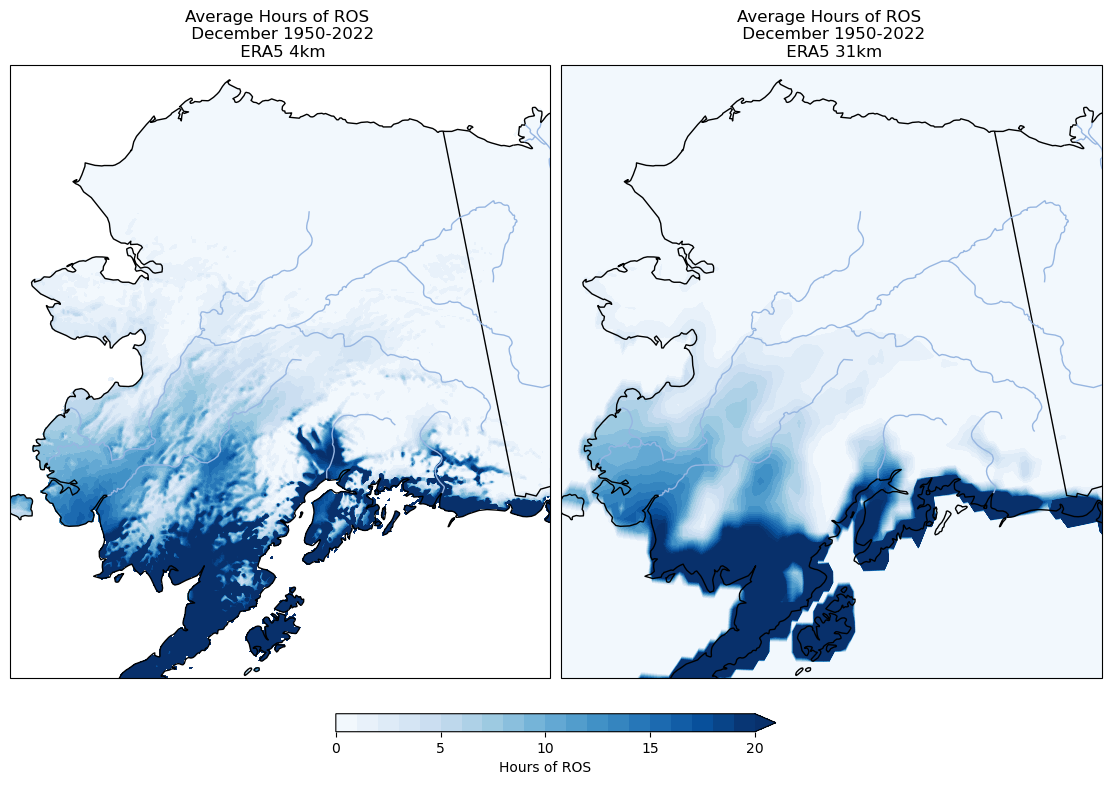

In [11]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [11]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [12]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [13]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 31km")

for ax in axs:
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [11]:
# Create the figure and axes first, as before
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

FNSB_boundary.plot(ax=axs[0], facecolor='none', edgecolor='black', linewidth=2, zorder=25, transform=ccrs.AlbersEqualArea())
FNSB_boundary.plot(ax=axs[1], facecolor='none', edgecolor='black', linewidth=2, zorder=25, transform=ccrs.AlbersEqualArea())

cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat, era54km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap, levels=levels, extend='max', transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat, era531km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap, levels=levels, extend='max', transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 31km")

for ax in axs:
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=25, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8, fontweight='bold', color='black', zorder=20, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()


In [67]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,12,50)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

# Add a colorbar
cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 13, 1))

fig.patch.set_alpha(0.0)
plt.show()


In [22]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,15,50)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

# Add a colorbar
cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 16, 1))

fig.patch.set_alpha(0.0)
plt.show()


In [15]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()

In [16]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()

In [17]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))
fig.patch.set_alpha(0.0)
plt.show()

In [18]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))
fig.patch.set_alpha(0.0)
plt.show()

In [19]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))
fig.patch.set_alpha(0.0)
plt.show()

In [38]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,5,50)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=3).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=3).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

# Add a colorbar
cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()


In [20]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

#fig.suptitle("Average Days of ROS", y=0.9)
#levels = np.arange(0, 11, 1) 
levels=np.linspace(0,5,50)

cf1 = axs[0,0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0,0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km")

cf2 = axs[0,1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0,1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km")

cf1 = axs[1,0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1,0].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 4km")

cf2 = axs[1,1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=12).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1,1].set_title("Average Hours of ROS \n December 1950-2022\n ERA5 31km")

cf1 = axs[2,0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[2,0].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 4km")

cf2 = axs[2,1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=1).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[2,1].set_title("Average Hours of ROS \n January 1950-2022\n ERA5 31km")

cf1 = axs[3,0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[3,0].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 4km")

cf2 = axs[3,1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=2).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[3,1].set_title("Average Hours of ROS \n February 1950-2022\n ERA5 31km")


cf1 = axs[4,0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[4,0].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 4km")

cf2 = axs[4,1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=3).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[4,1].set_title("Average Hours of ROS \n March 1950-2022\n ERA5 31km")

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8,) 
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cf1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()

In [29]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)
cmap='Blues'
levels=np.arange(0,21,1)

cf1 = axs[0].contourf(era54kmlon, era54kmlat,era54km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km")

cf2 = axs[1].contourf(era531kmlon, era531kmlat,era531km['ros_tally'].sel(month=11).mean(dim='season'), cmap=cmap,levels=levels, extend='max',transform=ccrs.PlateCarree())
axs[1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km")

for ax in axs:
    Mun_of_Anc_boundary.plot(ax=ax, facecolor='none', edgecolor='red',linewidth=3,zorder=2,transform=ccrs.PlateCarree())
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree())  
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(cf1,cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()


In [18]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 155, 5)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Mun_of_Anc_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    Anchorage_lon = -149.9003
    Anchorage_lat = 61.2181
    ax.scatter(Anchorage_lon, Anchorage_lat, marker='*', color='white', s=75,zorder=9, transform=ccrs.PlateCarree())
    ax.text(Anchorage_lon, Anchorage_lat + 0.05, 'Anchorage', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='white', zorder=10, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree())  
    ax.set_aspect('equal')

# Add a colorbar
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()


In [72]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 41, 1)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=11).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=11).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Bethel_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    Bethel_lon = -161.7554
    Bethel_lat = 60.7913
    ax.scatter(Bethel_lon, Bethel_lat, marker='*', color='white', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Bethel_lon, Bethel_lat + 0.2, 'Bethel', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='white', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-166.0, -152.0, 58.0, 63.5], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [19]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 51, 1)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=11).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=11).mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n November 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Bethel_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    Bethel_lon = -161.7554
    Bethel_lat = 60.7913
    ax.scatter(Bethel_lon, Bethel_lat, marker='*', color='white', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Bethel_lon, Bethel_lat + 0.2, 'Bethel', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='white', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-166.0, -152.0, 58.0, 63.5], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [82]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 51, 1)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Mat_Su_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    palmer_lat= 61.5990 
    palmer_lon=-149.1180
    ax.scatter(palmer_lon, palmer_lat, marker='*', color='black', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(palmer_lon, palmer_lat + 0.2, 'Palmer', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-155.0, -146.0, 61.0, 64], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [20]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 101, 1)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Mat_Su_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    palmer_lat= 61.5990 
    palmer_lon=-149.1180
    ax.scatter(palmer_lon, palmer_lat, marker='*', color='black', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(palmer_lon, palmer_lat + 0.2, 'Palmer', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-155.0, -146.0, 61.0, 64], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [85]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,6), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

cmap = 'Blues'
levels = np.arange(0, 51, 1)

pc1 = axs[0].pcolormesh(era54kmlon, era54kmlat, 
                        era54km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

pc2 = axs[1].pcolormesh(era531kmlon, era531kmlat, 
                        era531km['ros_tally'].sel(month=[11, 12, 1, 2, 3]).sum(dim='month').mean(dim='season'), 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    Denali_boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
    healy_lat=63.8697
    healy_lon=-149.0215
    ax.scatter(healy_lon, healy_lat, marker='*', color='black', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(healy_lon, healy_lat + 0.2, 'Healy', ha='center', va='bottom', fontsize=12,
        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-155.0, -146.0, 62.0, 65], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Hours of ROS', ticks=levels[::5])

fig.patch.set_alpha(0.0)
plt.show()